# Supervised Machine Learning - Classification
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Iris Dataset (Multi-class Classification)
* Dataset Reference: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 
* Link to teh repository: https://archive.ics.uci.edu/ml/datasets/Iris

## Load Data

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Assign Column names 
* Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

In [3]:

data.columns = ['sepal length', 
                'sepal width',
                'petal length',
                'petal width',
                'class' ]
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing Data

In [4]:
# identify duplicates
duplicates = data[data.duplicated()]
duplicates

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
# Remove duplicates
data.drop_duplicates(keep='first', inplace=True)
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,147,NaN,NaN,NaN,5.85646,0.8291,4.3,5.1,5.8,6.4,7.9
sepal width,147,NaN,NaN,NaN,3.05578,0.437009,2,2.8,3,3.3,4.4
petal length,147,NaN,NaN,NaN,3.78027,1.75911,1,1.6,4.4,5.1,6.9
petal width,147,NaN,NaN,NaN,1.20884,0.757874,0.1,0.3,1.3,1.8,2.5
class,147,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

In [7]:
class_names = data['class'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Assign numbers to class labels
data['y_act'] = data['class']
data['y_act'].replace('Iris-setosa', 0, inplace=True)
data['y_act'].replace('Iris-versicolor', 1, inplace=True)
data['y_act'].replace('Iris-virginica', 2, inplace=True)

data.sample(5)

,sepal length,sepal width,petal length,petal width,class,y_act
64,5.6,2.9,3.6,1.3,Iris-versicolor,1
63,6.1,2.9,4.7,1.4,Iris-versicolor,1
132,6.4,2.8,5.6,2.2,Iris-virginica,2
67,5.8,2.7,4.1,1.0,Iris-versicolor,1
55,5.7,2.8,4.5,1.3,Iris-versicolor,1


## Finding Corelation

In [9]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'y_act'],
      dtype='object')

,sepal length,sepal width,petal length,petal width,y_act
sepal length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal width,0.817058,-0.356376,0.961883,1.000000,0.955693
y_act,0.782904,-0.418348,0.948339,0.955693,1.000000


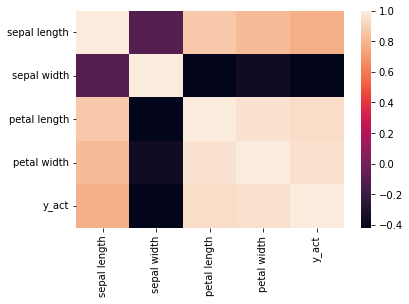

In [10]:
correlation_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'y_act']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [11]:
# Would you remove any feature based on corelation matrix?

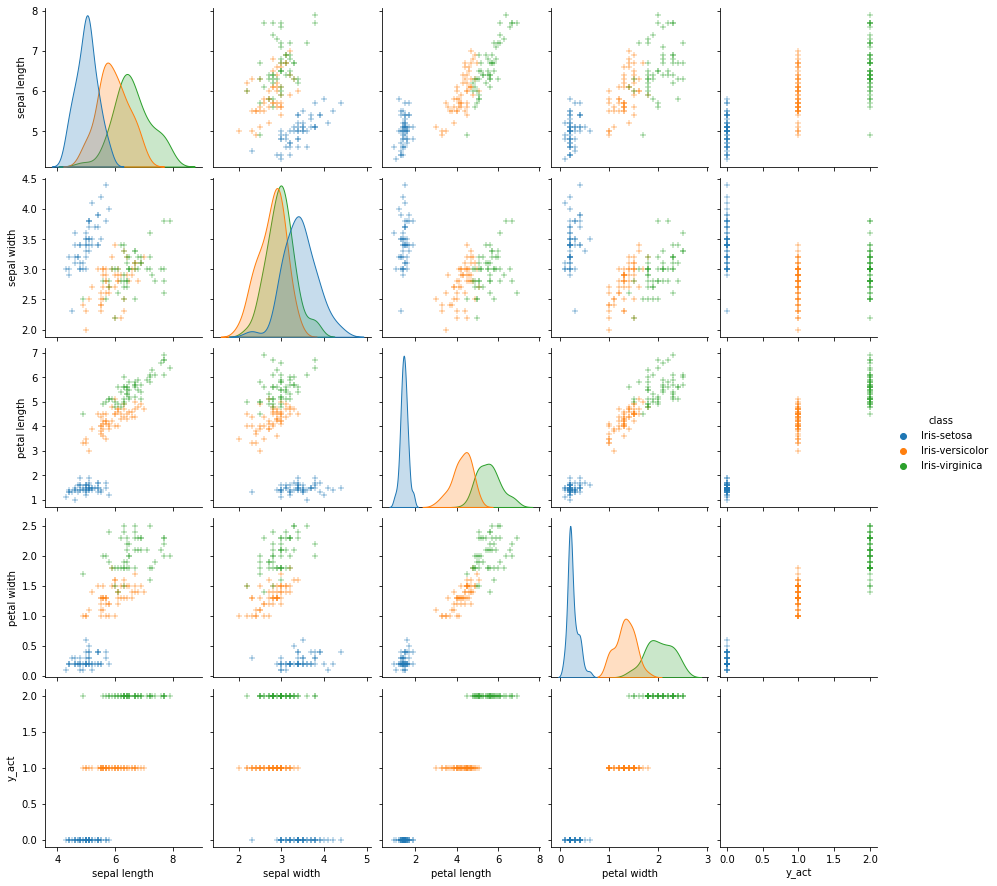

In [12]:
g = sns.pairplot(data, hue='class', markers='+')
plt.show()

## Identify `X` and `y`

In [13]:
X_variables = ['sepal length', 'petal length', 'petal width']
data[X_variables].head()

,sepal length,petal length,petal width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [14]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [15]:
# Three classes (y variable)
data[y_varibale].unique()

array([0, 1, 2])

In [16]:
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
X = data[X_variables].values
X[:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

In [18]:
y = data[y_varibale].values
y[:5]

array([0, 0, 0, 0, 0])

## Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 102
Test sample size  = 45


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [20]:
model = LogisticRegression()

## Train Model (use Training dataset)

In [21]:
model.fit(X_train, y_train)
# Removed the festure "sepal width".

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict (use Testing dataset)

In [22]:

class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
# Probability
model.predict_proba(X_test)[:5]

array([[1.04342527e-03, 4.35809450e-01, 5.63147124e-01],
       [3.43237626e-02, 9.24548547e-01, 4.11276907e-02],
       [8.56149187e-06, 3.57240054e-02, 9.64267433e-01],
       [9.61011475e-01, 3.89883302e-02, 1.94863813e-07],
       [1.00087194e-02, 6.15387827e-01, 3.74603453e-01]])

In [24]:
# Predicted Class
model.predict(X_test)[:5]

array([2, 1, 2, 0, 1])

## Predicted Probabilities of all three classes

In [25]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# class 0 probability
y_pred_prob_0

array([1.04342527e-03, 3.43237626e-02, 8.56149187e-06, 9.61011475e-01,
       1.00087194e-02, 9.76733595e-01, 5.91233405e-03, 9.49688971e-01,
       6.87620646e-04, 9.68426674e-01, 9.53371184e-01, 3.61596363e-01,
       5.31740561e-04, 4.32738601e-02, 9.67915107e-06, 5.14330326e-03,
       9.05685326e-01, 2.19151747e-02, 1.44876526e-03, 9.62182343e-01,
       9.64945642e-01, 9.41658769e-07, 9.86029013e-01, 6.25171447e-06,
       2.52028780e-01, 9.91873872e-01, 7.77487544e-03, 6.44238609e-07,
       8.89239545e-03, 9.62182343e-01, 6.62199998e-05, 9.79449701e-01,
       9.20687558e-04, 9.59166093e-01, 9.72054047e-01, 1.88048600e-05,
       2.83549092e-07, 3.50710686e-05, 9.03238348e-01, 9.67957011e-01,
       9.52531791e-01, 3.86093065e-08, 7.02378121e-03, 1.18008604e-04,
       3.33639965e-03])

In [26]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

## Create Results Data Frame for Test Sample

In [27]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2
20,0,0,0.964946,0.035054,2.246712e-07
26,1,1,0.007775,0.780358,2.118675e-01
12,2,2,0.000532,0.339088,6.603804e-01
38,0,0,0.903238,0.096760,1.863474e-06
44,1,1,0.003336,0.875799,1.208642e-01
32,2,2,0.000921,0.275749,7.233302e-01
39,0,0,0.967957,0.032043,9.921729e-08
33,0,0,0.959166,0.040834,1.543240e-07
0,2,2,0.001043,0.435809,5.631471e-01
28,1,1,0.008892,0.762470,2.286379e-01


In [28]:
#one-hot encode prediction column
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,2,2,0.001043,0.435809,5.631471e-01,0,0,1
1,1,1,0.034324,0.924549,4.112769e-02,0,1,0
2,2,2,0.000009,0.035724,9.642674e-01,0,0,1
3,0,0,0.961011,0.038988,1.948638e-07,1,0,0
4,2,1,0.010009,0.615388,3.746035e-01,0,1,0


## Confusion Matrix

In [29]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,17,0,0,17
1,0,11,1,12
2,0,2,14,16
All,17,13,15,45


In [30]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] + cfm.loc[2,2]) / cfm.loc['All','All'] 
acuracy

0.9333333333333333

In [31]:
# Use Scikit-Learn function (lgr = Logistic Regression)
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.9333333333333333

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.9335913978494623

# Decision Tree Classifier
* Use same training and testing datasets

In [33]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Visualize Decision Tree

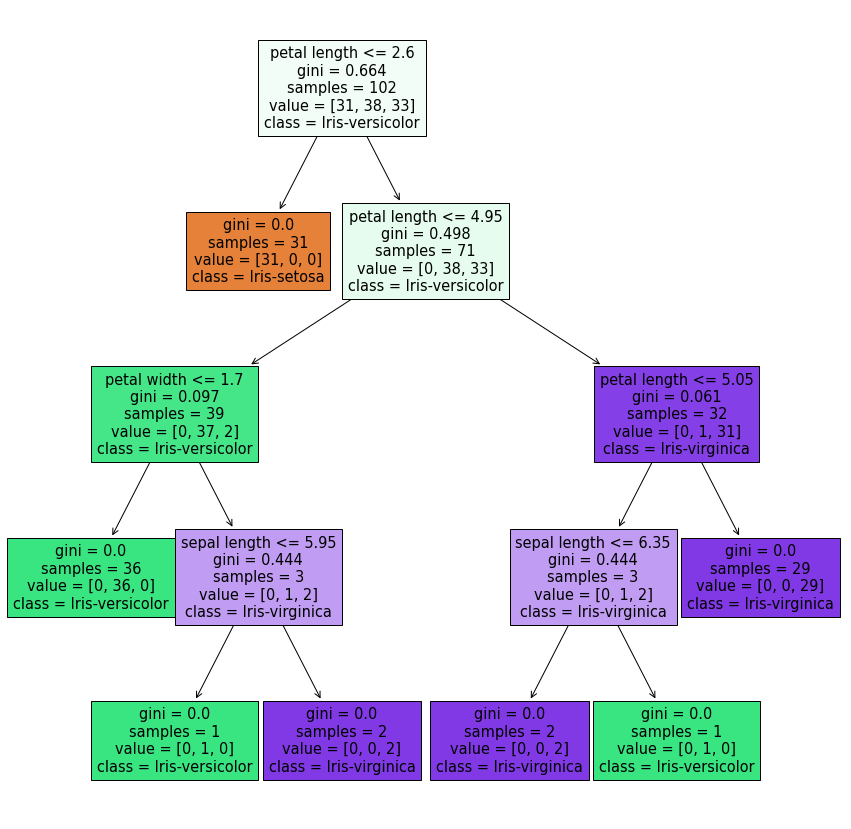

In [34]:
pfig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

In [35]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,2,2,0.0,0.0,1.0,0,0,1
1,1,1,0.0,1.0,0.0,0,1,0
2,2,2,0.0,0.0,1.0,0,0,1
3,0,0,1.0,0.0,0.0,1,0,0
4,2,1,0.0,1.0,0.0,0,1,0


In [36]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,17,0,0,17
1,0,11,1,12
2,0,2,14,16
All,17,13,15,45


In [37]:
# tc = Tree classifer
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.9333333333333333

In [38]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.9335913978494623

# Random Forest Classifier

In [39]:
# Create model object
model = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,2,2,0.00,0.23,0.77,0,0,1
1,1,1,0.00,1.00,0.00,0,1,0
2,2,2,0.00,0.00,1.00,0,0,1
3,0,0,1.00,0.00,0.00,1,0,0
4,2,1,0.09,0.87,0.04,0,1,0


In [41]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,17,0,0,17
1,0,11,1,12
2,0,1,15,16
All,17,12,16,45


In [42]:
# rf = Random Forest classifer
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.9555555555555556

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.9555555555555556

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [44]:
# Create model object
model = svm.SVC(kernel='linear', C=1.0, probability=True)

# Train Model
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,2,2,0.023445,0.345557,0.630999,0,0,1
1,1,1,0.020838,0.964854,0.014308,0,1,0
2,2,2,0.008486,0.006029,0.985485,0,0,1
3,0,0,0.939943,0.042819,0.017238,1,0,0
4,2,2,0.046837,0.425231,0.527931,0,0,1


In [46]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,17,0,0,17
1,0,11,1,12
2,0,1,15,16
All,17,12,16,45


In [47]:
acuracy_svm = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_svm

0.9555555555555556

In [48]:
f1_score_svm = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_svm

0.9555555555555556

# K-Neighbors Classifier
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [49]:
# Create model object
model = KNeighborsClassifier(n_neighbors=5)

# Train Model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,2,2,0.0,0.2,0.8,0,0,1
1,1,1,0.0,1.0,0.0,0,1,0
2,2,2,0.0,0.0,1.0,0,0,1
3,0,0,1.0,0.0,0.0,1,0,0
4,2,1,0.0,1.0,0.0,0,1,0


In [51]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,17,0,0,17
1,0,11,1,12
2,0,2,14,16
All,17,13,15,45


In [52]:
acuracy_knn = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_knn

0.9333333333333333

In [53]:
f1_score_knn = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_knn

0.9335913978494623

<hr>
Last update 2021-10-16 by Sumudu Tennakoon